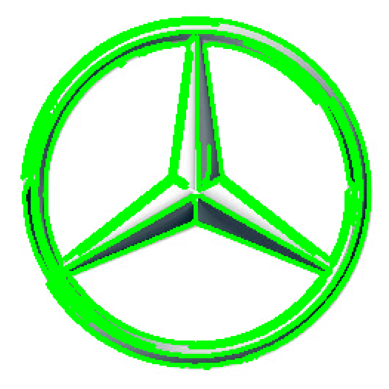

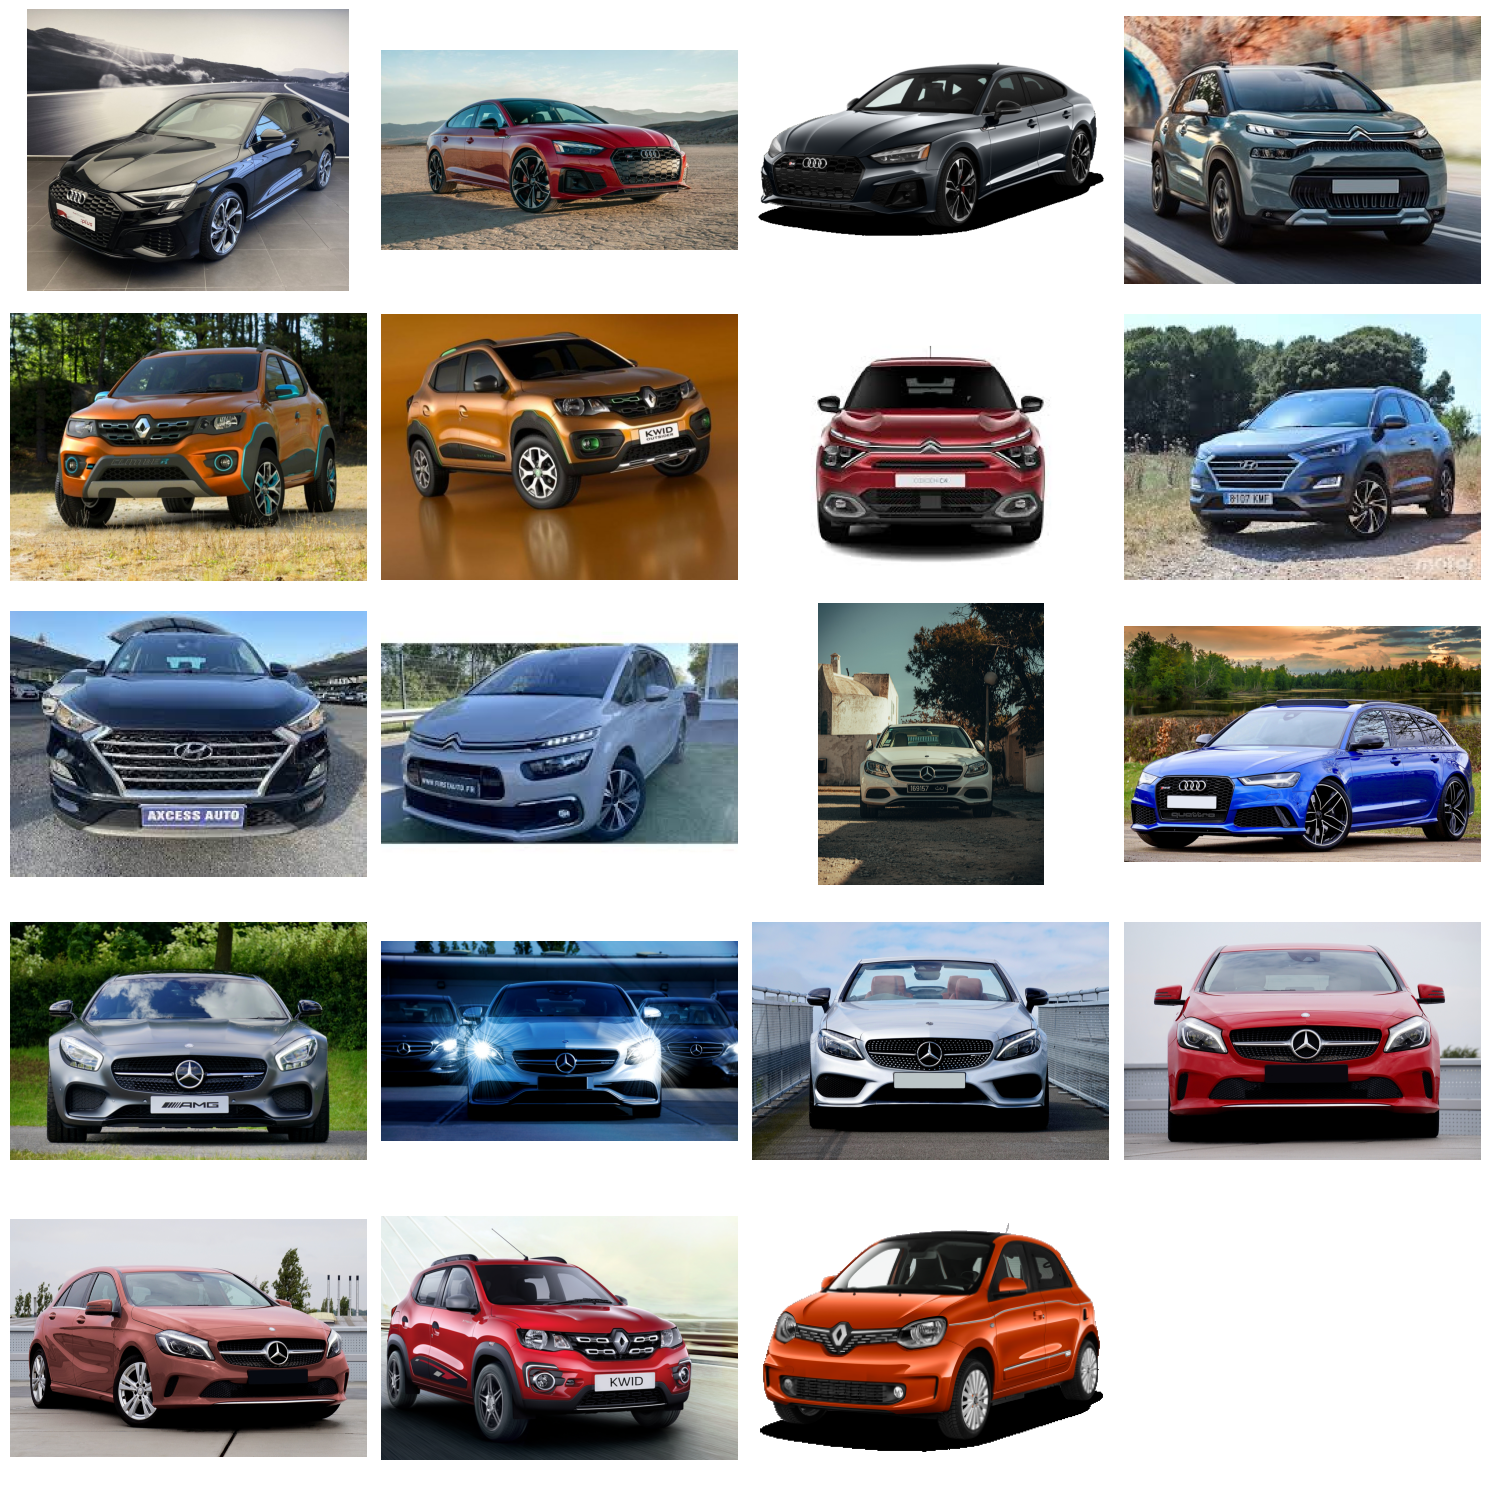

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

import cv2
import matplotlib.pyplot as plt

# Charger l'image contenant le logo
image = cv2.imread(r"C:\Users\mboup\Desktop\projetPython\photo\images d'entree\citroen.webp")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un flou et détecter les contours
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Trouver les contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Afficher l'image avec les contours détectés
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Charger l'image du logo et créer les keypoints et descripteurs du logo
chemin_logo = r"C:\Users\mboup\Desktop\projetPython\photo\images d'entree\Mercedes.jpg"  # Spécifiez le chemin de votre logo
logo = cv2.imread(chemin_logo, cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
kp_logo, des_logo = orb.detectAndCompute(logo, None)

# Chemin du répertoire contenant les images
repertoire_images = r"C:\Users\mboup\Desktop\projetPython\photo\images de sortie"  # Spécifiez le chemin de votre répertoire d'images

# Liste pour stocker les chemins des images correspondantes
images_avec_correspondances = []

# Parcourir tous les fichiers du répertoire des images
for root, dirs, files in os.walk(repertoire_images):
    for filename in files:
        chemin_image = os.path.join(root, filename)
        img = cv2.imread(chemin_image)
        kp_img, des_img = orb.detectAndCompute(img, None)
        
        if des_logo is not None and des_img is not None:
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches = bf.match(des_logo, des_img)
            
            if len(matches) > 0:
                images_avec_correspondances.append(img)

# Définir la taille de la grille pour afficher les images
nb_images = len(images_avec_correspondances)
nb_cols = 4  # Nombre de colonnes dans la grille
nb_rows = -(-nb_images // nb_cols)  # Calcul du nombre de lignes nécessaire

# Créer une figure Matplotlib pour afficher la grille d'images
fig, axes = plt.subplots(nb_rows, nb_cols, figsize=(15, 15))

# Afficher chaque image dans la grille
for i, img in enumerate(images_avec_correspondances):
    row = i // nb_cols
    col = i % nb_cols
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertir de BGR à RGB pour Matplotlib
    axes[row, col].axis('off')  # Masquer les axes

# Masquer les cellules vides s'il y en a dans la dernière ligne de la grille
for i in range(len(images_avec_correspondances), nb_rows * nb_cols):
    row = i // nb_cols
    col = i % nb_cols
    axes[row, col].axis('off')

plt.tight_layout()  # Ajuster le layout pour éviter le chevauchement
plt.show()
